Namespace(Diters=5, DitersAlt=100, batch_size=32, clamp_lower=-0.01, clamp_upper=0.01, decDRatio=5e-05, encDRatio=0.001, gpu_ids=[1], imdir='/root/data/release_4_1_17/release_v2/aligned/2D', imsize=128, latentDistribution='gaussian', lrDec=5e-05, lrDecD=5e-05, lrEnc=5e-05, lrEncD=5e-05, model_name='aaegan_256', myseed=0, ndat=-1, nepochs=1000, nlatentdim=16, noise=0.01, optimizer='adam', saveProgressIter=1, saveStateIter=10, save_dir='./test_aaegan/aaegan_128_29/', train_module='aaegan_train_legacy')
Epoch: 66.0


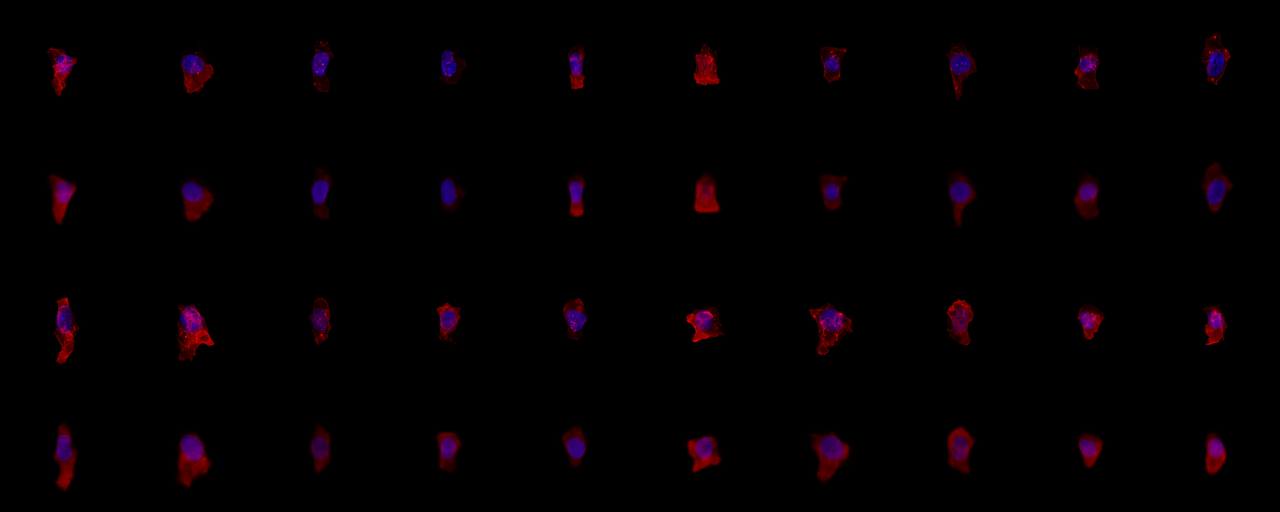

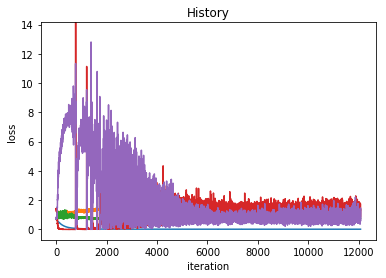

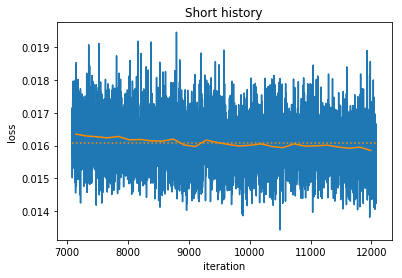

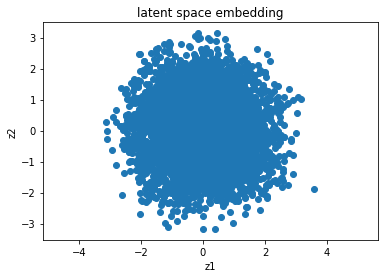

In [166]:
import SimpleLogger as SimpleLogger
import torch
from IPython.core.display import Image, display
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
import sklearn

%matplotlib inline

model_dir = './waaegan2_32D6/'
model_dir = './test_waaegan/test_waaegan3/'
# model_dir = './test_waaegan/test_waaegan3_2/'
# model_dir = './test_waaegan/test_waaegan3_3/' 
# model_dir = './test_waaegan/test_waaegan3_5/' 
# model_dir = './test_waaegan/test_waaegan3_6/' 
# model_dir = './test_waaegan/test_waaegan3_7/' #762 epochs, 32D
# model_dir = './test_waaegan/test_waaegan3_8/'
# model_dir = './test_waaegan/test_waaegan3_9/'
# model_dir = './test_waaegan/test_waaegan3_10/' #290 epochs, 16D
# model_dir = './test_waaegan/test_waaegan3_11/'
# model_dir = './test_waaegan/test_waaegan3_12/'
# model_dir = './test_waaegan/test_waaegan3_13/'
# model_dir = './test_waaegan/test_waaegan3_14/'
# model_dir = './test_waaegan/test_waaegan3_15/'
# model_dir = './test_waaegan/test_waaegan3_15/'
model_dir = './test_waaegan/test_waaegan3_16/' 
# model_dir = './test_waaegan/test_waaegan3_17/' 
# model_dir = './test_waaegan/test_waaegan3_18/' 

# model_dir = './test_waaegan/waaegan2_32D2/'
# model_dir = './test_waaegan/waaegan2_128D/'

# model_dir = './test_waaegan/waaegan_128D'

# model_dir = './test_waaegan/waaegan/'
# model_dir = './test_waaegan/waaegan_1E-4/'
# model_dir = './test_waaegan/semi_waaegan/'
# model_dir = './test_aaegan/aaegan/'
# model_dir = './test_aaegan/aaegan_256_2/'
# model_dir = './test_aaegan/aaegan_256_3/'
model_dir = './test_aaegan/aaegan_256_4/'
# model_dir = './test_aaegan/aaegan_256_5/'
# model_dir = './test_aaegan/aaegan_256_6/'
# model_dir = './test_aaegan/aaegan_256_7/'
# model_dir = './test_aaegan/aaegan_256_8/'
# model_dir = './test_aaegan/aaegan_256_9/'
# model_dir = './test_aaegan/aaegan_feedback_256/'
# model_dir = './test_aaegan/aaegan_256_tanh/'
# # model_dir = './test_aaegan/aaegan_256_tanh2/'
# model_dir = './test_aaegan/aaegan_256_tanh3/'
# # model_dir = './test_aaegan/aaegan_128_tanh/'
# model_dir = './test_aaegan/aaegan_128_tanh2/'
# # model_dir = './test_aaegan/aaegan_128_tanh3/'
# # model_dir = './test_aaegan/aaegan_256_tanh4/'

model_dir = './test_aaegan/aaegan_128_1/'
# model_dir = './test_aaegan/aaegan_128_2/'
model_dir = './test_aaegan/aaegan_128_3/'
# model_dir = './test_aaegan/aaegan_128_4/'  
# model_dir = './test_aaegan/aaegan_128_5/' 
# model_dir = './test_aaegan/aaegan_128_6/'
# model_dir = './test_aaegan/aaegan_128_7/'
# model_dir = './test_aaegan/aaegan_128_8/'
model_dir = './test_aaegan/aaegan_128_9/'
# model_dir = './test_aaegan/aaegan_128_10/'
model_dir = './test_aaegan/aaegan_128_11/' #beta2 of 0.9
model_dir = './test_aaegan/aaegan_128_12/' #beta2 of 0.999

model_dir = './test_aaegan/aaegan_128_13/' #beta2 of 0.999, elu, bias
model_dir = './test_aaegan/aaegan_128_14/' #beta2 of 0.999, prelu, bias

# model_dir = './test_aaegan/aaegan_128_15/' 
model_dir = './test_aaegan/aaegan_128_16/' 
# model_dir = './test_aaegan/aaegan_128_17/'
model_dir = './test_aaegan/aaegan_128_18/'
model_dir = './test_aaegan/aaegan_128_19/'
# model_dir = './test_aaegan/aaegan_128_20/'
# model_dir = './test_aaegan/aaegan_128_21/'
# model_dir = './test_aaegan/aaegan_128_22/'
model_dir = './test_aaegan/aaegan_128_23/'
model_dir = './test_aaegan/aaegan_128_24/'
model_dir = './test_aaegan/aaegan_128_25/'
model_dir = './test_aaegan/aaegan_128_26/' #--train legacy
model_dir = './test_aaegan/aaegan_128_27/' 
# model_dir = './test_aaegan/aaegan_128_28/' 
model_dir = './test_aaegan/aaegan_128_29/' 
# model_dir = './test_aaegan/aaegan_128_30/' 


history = 5000
bw = 100

opt = pickle.load( open( '{0}/opt.pkl'.format(model_dir), "rb" ) )
logger = pickle.load( open( '{0}/logger_tmp.pkl'.format(model_dir), "rb" ) )
embedding = pickle.load( open('./{0}/embedding_tmp.pkl'.format(model_dir), "rb"))

print(opt)

epoch = max(logger.log['epoch'])

print('Epoch: ' + str(epoch))

plt.figure(1)
plt.plot(logger.log['iter'], logger.log['reconLoss'])
plt.plot(logger.log['iter'], logger.log['encDLoss'])
plt.plot(logger.log['iter'], logger.log['minimaxEncDLoss'])
plt.plot(logger.log['iter'], logger.log['decDLoss'])
plt.plot(logger.log['iter'], logger.log['minimaxDecDLoss'])
# plt.ylim([-4, 4]) 
plt.title('History')
plt.xlabel('iteration')
plt.ylabel('loss')

ydat = [logger.log['encDLoss'], logger.log['decDLoss'], logger.log['minimaxEncDLoss'], logger.log['minimaxDecDLoss']]
ymin = np.min(ydat.append(logger.log['reconLoss']))
ymax = np.max(ydat)
plt.ylim([ymin, ymax])

x = logger.log['iter'][-history:]
y = logger.log['reconLoss'][-history:]

f = np.ones(bw)/bw
yhat = np.correlate(y-np.mean(y), f, mode='same').tolist() + np.mean(y)


epochs = np.floor(np.array(logger.log['epoch'][-history:-1]))
losses = np.array(logger.log['reconLoss'][-history:-1])
iters = np.array(logger.log['iter'][-history:-1])
uepochs = np.unique(epochs)

epoch_losses = np.zeros(len(uepochs))
epoch_iters = np.zeros(len(uepochs))
i = 0
for uepoch in uepochs:
    inds = np.equal(epochs, uepoch)
    loss = np.mean(losses[inds])
    epoch_losses[i] = loss
    epoch_iters[i] = np.mean(iters[inds])
    i+=1
    
mval = np.mean(losses)

plt.figure(2)
plt.plot(x, y)
plt.plot(epoch_iters, epoch_losses, color='darkorange')
plt.plot([np.min(iters), np.max(iters)], [mval, mval], color='darkorange', linestyle=':')

plt.title('Short history')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.figure(3)
plt.scatter(embedding[:,0], embedding[:,1])
plt.xlim([-4, 4]) 
plt.ylim([-4, 4])     
plt.axis('equal')
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('latent space embedding')

im_progress_path = '{0}/progress_{1}.png'.format(model_dir, epoch)
display(Image(im_progress_path, unconfined=True))